In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

In [2]:
ompfor_data = {64: np.zeros((5, 12, 10)), 128: np.zeros((5, 12, 10))}
batch_data = {64: np.zeros((5, 12, 10)), 128: np.zeros((5, 12, 10))}
with open("result.txt", "r") as fd:
    all_lines = fd.readlines()
    for i in reversed(range(len(all_lines))):
        if all_lines[i][0] == '#':
            del all_lines[i]
    total_tests = len(all_lines)/14
    i2 = 0
    for i in range(14, len(all_lines), 14):
        run_cmd = all_lines[i-14]
        ompfor = all_lines[i-8]
        batch = all_lines[i-4]
        #print run_cmd, ompfor, batch,
        sp = run_cmd.split()
        rb, cb, bs, mr, nt = map(int, [sp[j] for j in [1, 2, 3, 4, 7]])
        #print rb, cb, bs, mr, nt, rb*cb
        i0 = int(np.log2(rb*cb/64))
        i1 = nt/3-1
        #print i0, i1, i2
        ompfor_data[bs][i0, i1, i2] = float(ompfor.split()[2])
        batch_data[bs][i0, i1, i2] = float(batch.split()[2])
        if i2 == 9:
            i2 = 0
        else:
            i2 += 1

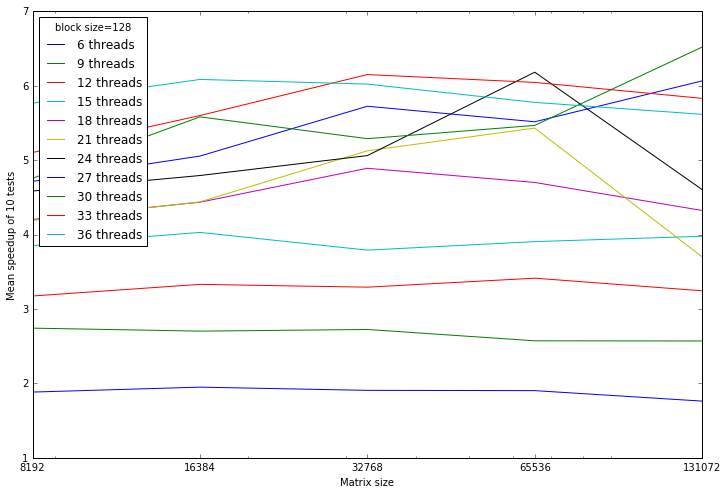

In [26]:
bs = 128
data = batch_data
draw_data = np.array([[[data[bs][i,j].min(), data[bs][i,j].mean(), data[bs][i,j].max()]
                       for j in range(12)] for i in range(5)])
size = bs*64*2**np.arange(5)

fig, ax = plt.subplots(figsize=(12,8))
for i in range(1, 12):
    ax.semilogx(size, draw_data[:,0,1]/draw_data[:,i,1], label="{} threads".format(3*i+3))
ax.set_xticks(size)
ax.set_xlim(size[0], size[-1])
ax.set_xticklabels(size)
ax.set_xlabel("Matrix size")
ax.set_ylabel("Mean speedup of 10 tests")
#ax.set_yticklabels(np.arange())
ax.legend(title="block size=128", loc=2)
plt.savefig("batched speedup bs128.pdf")

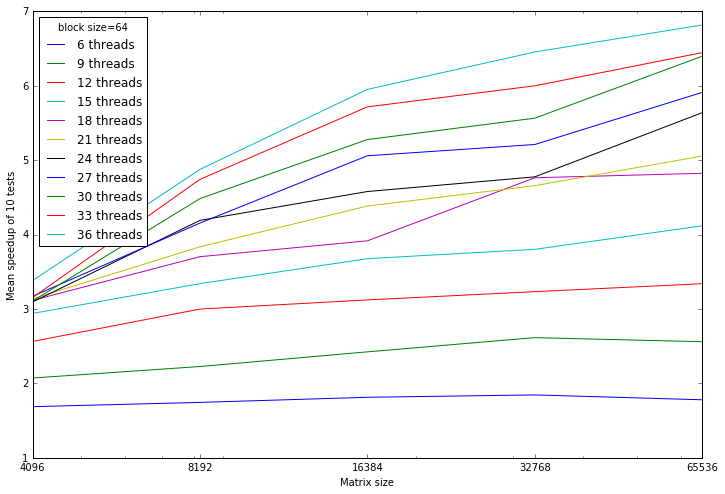

In [27]:
bs = 64
data = ompfor_data
draw_data = np.array([[[data[bs][i,j].min(), data[bs][i,j].mean(), data[bs][i,j].max()]
                       for j in range(12)] for i in range(5)])
size = bs*64*2**np.arange(5)

fig, ax = plt.subplots(figsize=(12,8))
for i in range(1, 12):
    ax.semilogx(size, draw_data[:,0,1]/draw_data[:,i,1], label="{} threads".format(3*i+3))
ax.set_xticks(size)
ax.set_xlim(size[0], size[-1])
ax.set_xticklabels(size)
ax.set_xlabel("Matrix size")
ax.set_ylabel("Mean speedup of 10 tests")
#ax.set_yticklabels(np.arange())
ax.legend(title="block size=64", loc=2)
plt.savefig("batched speedup bs64.pdf")

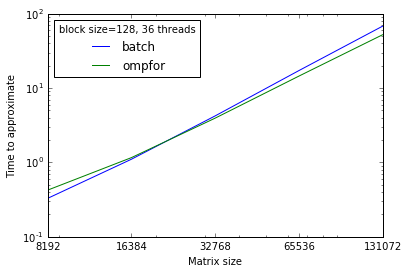

In [28]:
bs = 128
draw_data = np.array([[[batch_data[bs][i,j].mean(), ompfor_data[bs][i,j].mean()]
                       for j in range(12)] for i in range(5)])
size = bs*64*2**np.arange(5)

fig, ax = plt.subplots(figsize=(6,4))
ax.loglog(size, draw_data[:,-1,0], label="batch")
ax.loglog(size, draw_data[:,-1,1], label="ompfor")
ax.set_xticks(size)
ax.set_xlim(size[0], size[-1])
ax.set_xticklabels(size)
ax.set_xlabel("Matrix size")
ax.set_ylabel("Time to approximate")
ax.legend(title="block size=128, 36 threads", loc=2)
plt.savefig("batched vs ompfor bs128.pdf")

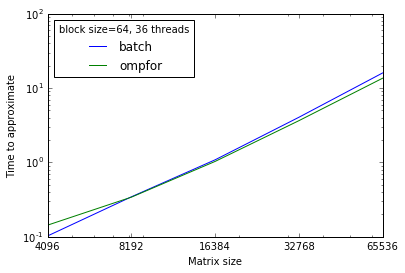

In [29]:
bs = 64
draw_data = np.array([[[batch_data[bs][i,j].mean(), ompfor_data[bs][i,j].mean()]
                       for j in range(12)] for i in range(5)])
size = bs*64*2**np.arange(5)

fig, ax = plt.subplots(figsize=(6,4))
ax.loglog(size, draw_data[:,-1,0], label="batch")
ax.loglog(size, draw_data[:,-1,1], label="ompfor")
ax.set_xticks(size)
ax.set_xlim(size[0], size[-1])
ax.set_xticklabels(size)
ax.set_xlabel("Matrix size")
ax.set_ylabel("Time to approximate")
ax.legend(title="block size=64, 36 threads", loc=2)
plt.savefig("batched vs ompfor bs64.pdf")